In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [144]:
df = pd.read_csv("2-multiplegradesdataset.csv")

In [145]:
df.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5


In [146]:
df.describe()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
count,50.00000,50.000000,50.000000,50.00000,50.00000
mean,3.66800,7.022000,89.736000,3.09000,76.07000
std,1.40123,0.874419,4.924813,0.89699,11.70915
min,1.10000,4.400000,80.400000,1.50000,56.90000
25%,2.67500,6.500000,85.625000,2.22500,68.07500
50%,3.60000,7.050000,90.100000,3.20000,73.55000
75%,4.50000,7.575000,92.550000,3.57500,84.17500
max,6.80000,8.600000,100.000000,5.70000,100.00000


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Study Hours         50 non-null     float64
 1   Sleep Hours         50 non-null     float64
 2   Attendance Rate     50 non-null     float64
 3   Social Media Hours  50 non-null     float64
 4   Exam Score          50 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB


In [148]:
df.isnull().sum()

Study Hours           0
Sleep Hours           0
Attendance Rate       0
Social Media Hours    0
Exam Score            0
dtype: int64

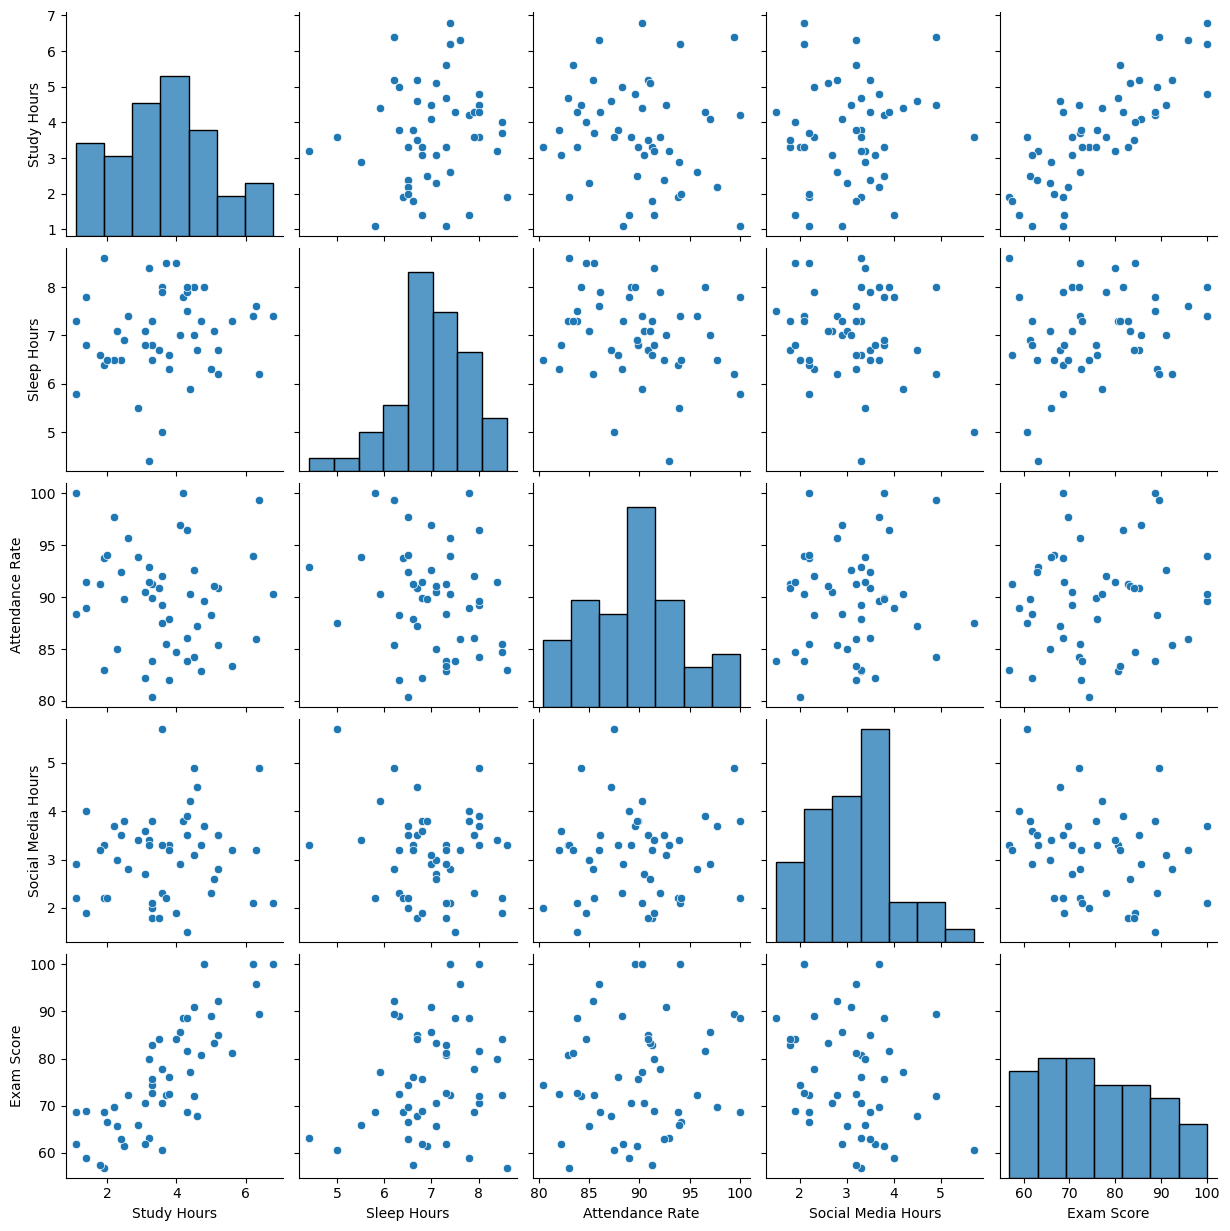

In [149]:
sns.pairplot(df)
plt.show()

In [150]:
df.corr()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
Study Hours,1.000000,0.114015,-0.112860,0.115023,0.804266
Sleep Hours,0.114015,1.000000,-0.222024,-0.177166,0.227694
Attendance Rate,-0.112860,-0.222024,1.000000,0.068272,0.123791
Social Media Hours,0.115023,-0.177166,0.068272,1.000000,-0.248743
Exam Score,0.804266,0.227694,0.123791,-0.248743,1.000000


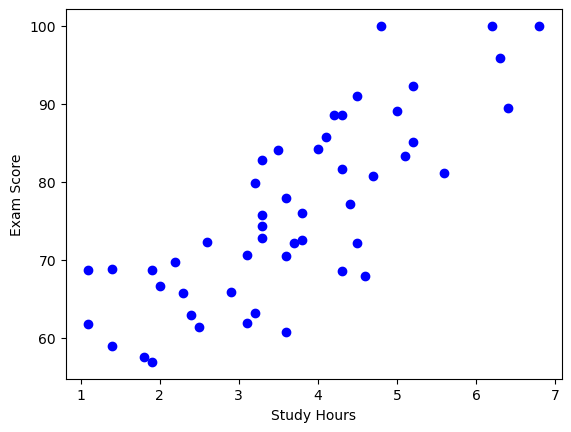

In [151]:
plt.scatter(df['Study Hours'],df['Exam Score'],color="b")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

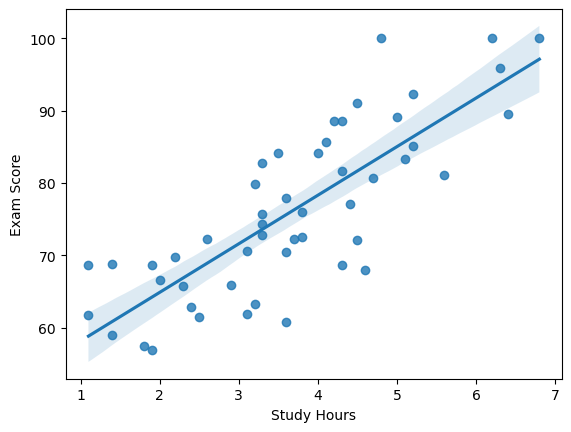

In [152]:
sns.regplot(x=df['Study Hours'],y =df['Exam Score'])
plt.show()

In [153]:
#Noktalar → gerçek veri (çalışma saati vs. puan).
#Çizgi → “Çalışma süresi arttıkça sınav puanı nasıl değişiyor?” sorusunun istatistiksel trend cevabı.
#Çizginin eğimi → ilişkinin pozitif mi (çok çalışınca puan artıyor mu) yoksa negatif mi (çok çalışınca puan düşüyor mu) olduğunu gösterir.
#gresyon çizgisinin etrafındaki gölgeli alan, regresyonun güven aralığını gösterir. Bu alan, ilişkinin ne kadar değişkenlik gösterdiğini ve regresyon çizgisinin gerçek ilişkiyi temsil etme gücünü belirtir.
#Alanın geniş olması, ilişkinin o kadar da güçlü veya tutarlı olmayabileceğini gösterir.

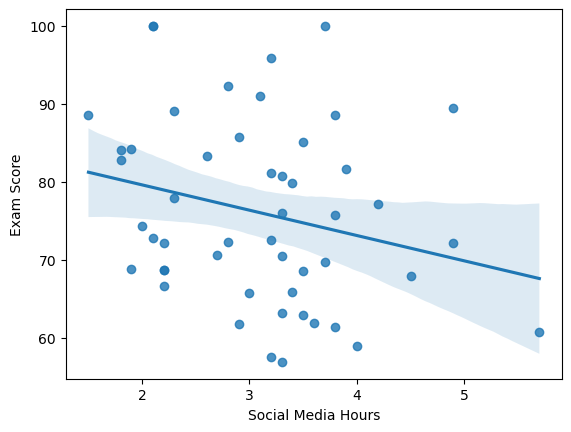

In [154]:
sns.regplot(x=df['Social Media Hours'],y =df['Exam Score'])
plt.show()

In [155]:
df.tail()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
45,2.9,5.5,93.9,3.4,65.9
46,3.3,7.3,83.8,2.1,72.8
47,5.6,7.3,83.4,3.2,81.1
48,4.5,7.0,92.6,3.1,91.0
49,1.4,6.8,91.5,1.9,68.8


In [156]:
#independet and dependent features
#X=df.iloc[:,:-1] son kolan hariç hepsini al
#y=df.iloc[:,1]son kolonu al
#bunları yapabilmek için y nin son kolonda olması lazım
X=df[["Study Hours","Sleep Hours","Attendance Rate","Social Media Hours"]]
y=df["Exam Score"]

In [157]:
X.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours
0,4.7,7.3,82.9,3.3
1,3.8,6.6,87.9,3.3
2,5.0,6.3,88.3,2.3
3,6.3,7.6,86.0,3.2
4,3.6,8.0,89.2,3.3


In [158]:
y.head()

0    80.7
1    76.0
2    89.1
3    95.9
4    70.5
Name: Exam Score, dtype: float64

In [159]:
#train - test split

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [162]:
from sklearn.preprocessing import StandardScaler

In [163]:
scaler = StandardScaler()

In [164]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [165]:
X_train

array([[-0.37204231,  0.33572221,  0.35358346, -1.47665184],
       [ 1.75665339,  0.68728036, -0.81371815,  0.12022844],
       [ 1.82760991, -0.95332438,  2.13757271,  2.05929734],
       [ 0.33752292,  1.15602457,  1.49886051,  0.91866857],
       [-0.37204231,  0.33572221, -1.29825844, -1.13446321],
       [ 1.25995773,  0.33572221, -1.38635668,  0.12022844],
       [-0.44299884,  1.62476879,  0.39763257,  0.34835419],
       [ 0.69230554,  1.15602457, -0.02083404,  0.69054282],
       [-0.9396945 , -0.13302201,  0.02321508,  0.8046057 ],
       [-0.44299884, -3.06267333,  0.70597639,  0.23429131],
       [ 0.97613163, -0.95332438, -0.94586551, -0.33602307],
       [ 2.11143601,  0.45290826,  0.13333787, -1.13446321],
       [ 0.62134902,  0.33572221, -1.49647947,  0.23429131],
       [-1.43639016, -0.48458016,  0.35358346,  0.12022844],
       [ 0.55039249, -0.36739411, -0.54942345,  1.60304584],
       [-1.01065102, -0.60176622,  0.5958536 ,  0.46241707],
       [-0.15917274,  1.

In [166]:
from sklearn.linear_model import LinearRegression

In [167]:
regression = LinearRegression()

In [168]:
regression.fit(X_train,y_train)

LinearRegression()

In [169]:
X_test[0]

array([-1.93308583, -1.42206859,  2.26972006, -1.02040033])

In [170]:
df.iloc[0]

Study Hours            4.7
Sleep Hours            7.3
Attendance Rate       82.9
Social Media Hours     3.3
Exam Score            80.7
Name: 0, dtype: float64

In [171]:
news_student=[[5,7,90,10]]

In [172]:
new_student_scaled = scaler.transform(news_student)

C:\Users\AlperKömpe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [173]:
regression.predict(new_student_scaled)

array([56.65819312])

In [174]:
#prediction

In [175]:
y_pred = regression.predict(X_test)

In [176]:
y_pred

array([64.65631656, 84.21781786, 64.74440895, 68.66076963, 72.59590158,
       83.21624374, 63.57138016, 83.71951916, 82.5788058 , 67.88042771,
       74.76584222, 75.61587239, 57.6106452 ])

In [177]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [178]:
mse  = mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mse: ",mse)
print("mae: ",mae)
print("r2 score: ",mse)

mse:  14.840108358882315
mae:  3.338458010436358
r2 score:  14.840108358882315


In [179]:
#adjusted score
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7824451326172812

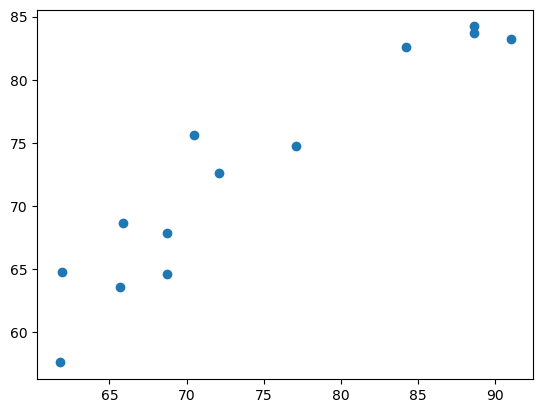

In [180]:
plt.scatter(y_test,y_pred)
plt.show()

In [181]:
y_pred

array([64.65631656, 84.21781786, 64.74440895, 68.66076963, 72.59590158,
       83.21624374, 63.57138016, 83.71951916, 82.5788058 , 67.88042771,
       74.76584222, 75.61587239, 57.6106452 ])

In [184]:
residuals = y_test - y_pred

In [185]:
print(residuals)

13    4.043683
39    4.382182
30   -2.844409
45   -2.760770
17   -0.495902
48    7.783756
26    2.128620
25    4.880481
32    1.621194
19    0.819572
12    2.334158
4    -5.115872
37    4.189355
Name: Exam Score, dtype: float64


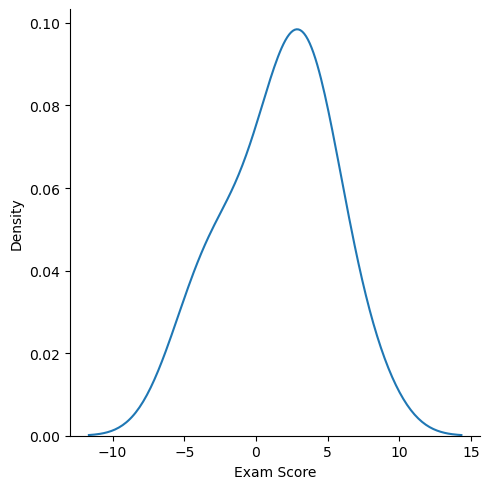

In [187]:
sns.displot(residuals,kind="kde")
plt.show()

In [188]:
regression.intercept_

np.float64(76.72162162162164)

In [189]:
regression.coef_

array([10.16883216,  1.42717312,  2.60099488, -3.6435975 ])

In [190]:
X.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours
0,4.7,7.3,82.9,3.3
1,3.8,6.6,87.9,3.3
2,5.0,6.3,88.3,2.3
3,6.3,7.6,86.0,3.2
4,3.6,8.0,89.2,3.3


In [191]:
df

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5
5,3.6,7.9,92.0,2.3,77.9
6,6.4,6.2,99.4,4.9,89.5
7,5.2,6.7,90.9,3.5,85.1
8,3.3,7.3,91.3,1.8,82.8
9,4.8,8.0,89.6,3.7,100.0


In [195]:
students = [
    [6,8,95,5],
    [3,6,85,4],
    [4,7,80,3]
]

In [196]:
regression.predict(scaler.transform(students))

C:\Users\AlperKömpe\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([89.19033956, 62.62651024, 72.80611178])